## Import initial python packages

In [125]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as mp
import matplotlib.pyplot as plt

print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
# print(f"matplotlib version: {mp.__version__}")

import utils
print('All packages imported successfully!')

pandas version: 2.2.1
numpy version: 1.26.4
Seaborn version: 0.12.2
All packages imported successfully!


## Explore the dataset

In [126]:
# Original dataset was xlsx, convert to csv
df = pd.DataFrame(pd.read_excel("data/1688640705_hr_comma_sep.xlsx")) 
df.to_csv("data/hr_comma_sep.cvs", index=False)
df.head()

In [ ]:
# Display basic statistics of the data
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
# Checking columns / rows dimensions & types
columns = list(df.columns)
dimensions = df.shape
print(
    f"Dimensions {dimensions} Data contains {dimensions[0]} rows and {dimensions[1]} columns"
)
print(f"Columns are {list(df.columns)}\n")
print(f"Dataset type: \n{df.dtypes}")

Dimensions (14999, 10) Data contains 14999 rows and 10 columns
Columns are ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Dataset type: 
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


##  1. Perform data quality checks by checking for missing values, if any

In [ ]:
# Check for missing values 
print("df.info() \n")
print(f"{df.info()} \n ")
print("Check for isna() \n")
print(f"{df.isna().sum()} \n")


df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None 
 
Check for isna() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left

In [ ]:
print("Check for isnull() \n")
print(f"{df.isnull().sum()}")

Check for isnull() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


__Observation__:

- There are no empty rows in the dataset.

##  2. Understand what factors contributed most to employee turnover by EDA

### Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data



In [ ]:
# Calculating a Correlation Matrix with Pandas
# Remove sales & salary
df1 = df[columns[:-2]] 
matrix = df1.corr().round(2)
matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


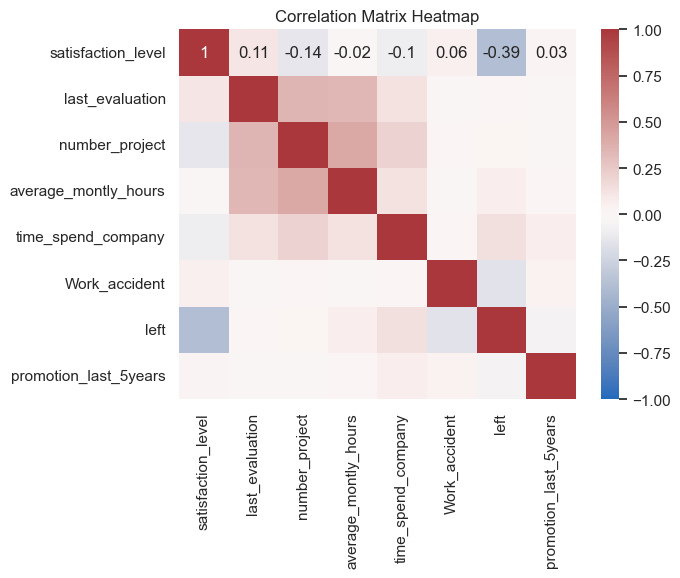

In [ ]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
# sns.heatmap(matrix, annot=True,cmap='vlag')
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Correlation Matrix Heatmap')
plt.show()

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


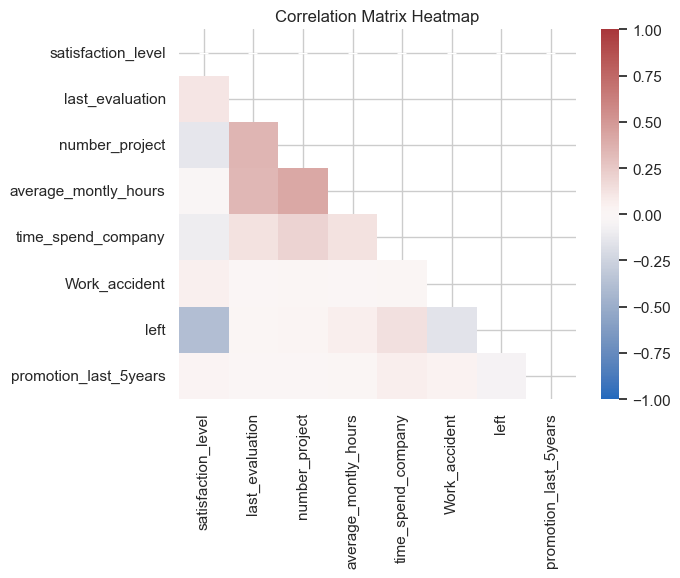

In [ ]:
# show the bottom half of our visualization
# triu() function creates a triangle of a matrix.
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# matrix = matrix[abs(matrix) >= 0.7]
# unstack_matrix = matrix.unstack()
# unstack_matrix[unstack_matrix < 0]

In [ ]:
# Remove temporaly 
import warnings
# Displays each FutureWarning only once.
warnings.simplefilter("once", FutureWarning)

### Draw distributions plot of employees

In [ ]:
# Set the esthetic style of the plots
sns.set_theme(style="whitegrid")

In [ ]:
# Check for inf before drawing distributions
# ds = df1.isin([np.inf, -np.inf])
# print(ds) 
print("Printing the count of infinity values \n") 
count = np.isinf(df1).values.sum() 
print("DF contains " + str(count) + " infinite values") 
c_inf = np.isinf(df1['satisfaction_level']).values.sum() 
print("Feature 'satisfaction_level' contains " + str(c_inf) + " infinite values") 

df1 = df1.replace([np.inf, -np.inf], np.nan)
c_na = df1['satisfaction_level'].isna().sum()
print("Feature 'satisfaction_level' contains " + str(c_na) + " NaN values") 

df['satisfaction_level'].describe()

Printing the count of infinity values 

DF contains 0 infinite values
Feature 'satisfaction_level' contains 0 infinite values
Feature 'satisfaction_level' contains 0 NaN values


count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

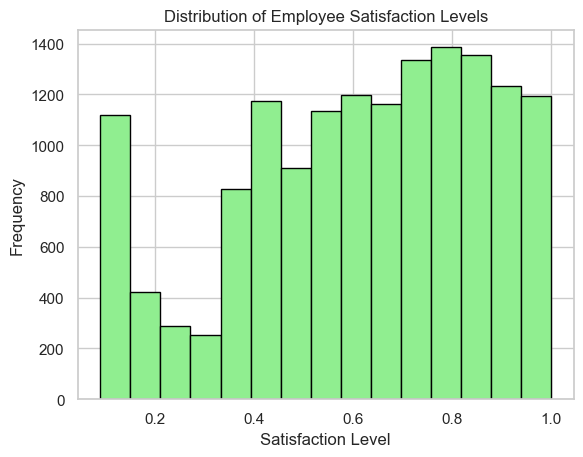

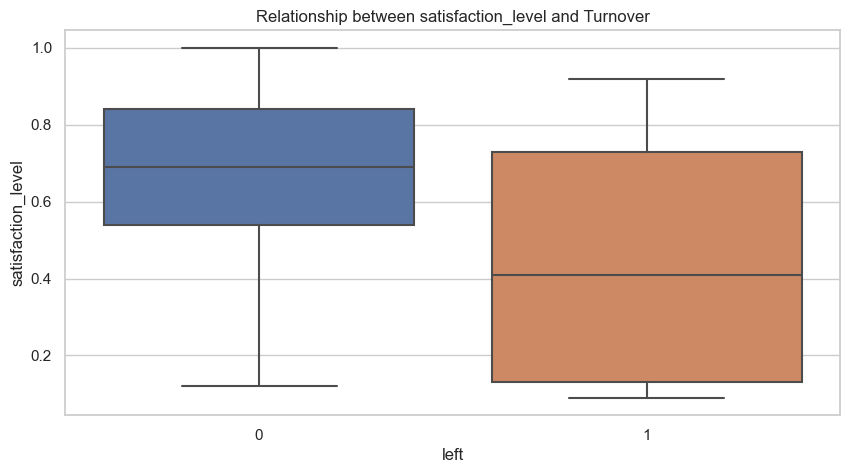

In [ ]:
plt.title('Distribution of Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.hist(df1['satisfaction_level'], color='lightgreen', ec='black', bins=15)

plt.figure(figsize=(10, 5))
sns.boxplot(x='left', y=df1['satisfaction_level'], data=df)
plt.title(f'Relationship between satisfaction_level and Turnover')
plt.show()

We can observe that the satisfaction level of employes is high.


Adding  KDE overlay to highlight the underlying distribution pattern.
 
The following plots show the frequency distribution of:  

- Employee Satisfaction
- Employee Evaluation
- Employee Average Monthly Hours


/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


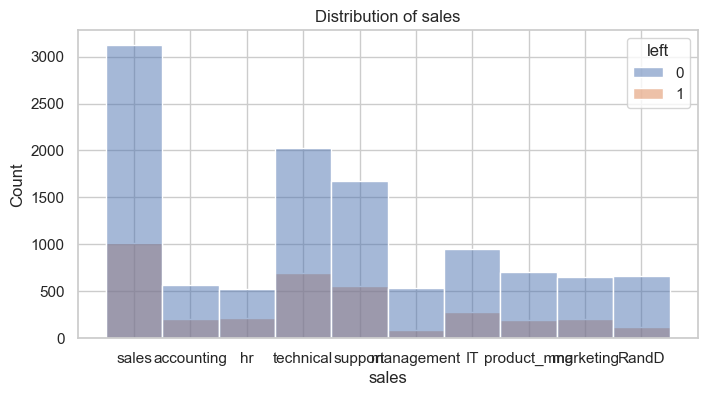

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


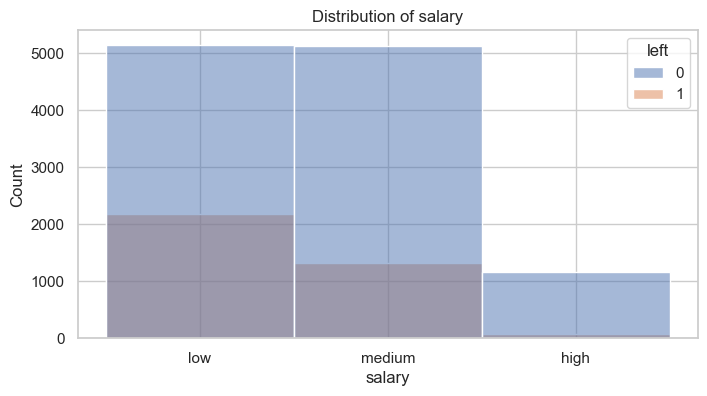

In [ ]:
# Separate categorical and numerical variables
cols = list(df.columns)
categorical_vars = cols[-2:] #['sales', 'salary']
numeric_vars = df.drop(columns=categorical_vars).columns
# skip_num_vars = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


# Plot relationship between numerical features and turnover
# Distribution of Numerical Features and turnover
numeric_vars_2 = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
# for feature in numeric_vars_2:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(df[feature], kde=True, bins=15)
#     # sns.histplot(x=feature, hue='left',data=df,  kde=True, bins=15)
#     plt.title(f'Distribution of Employees based on {feature}')
#     plt.show()    

# Plot categorical features and turnover
for feature in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=feature, hue='left',data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


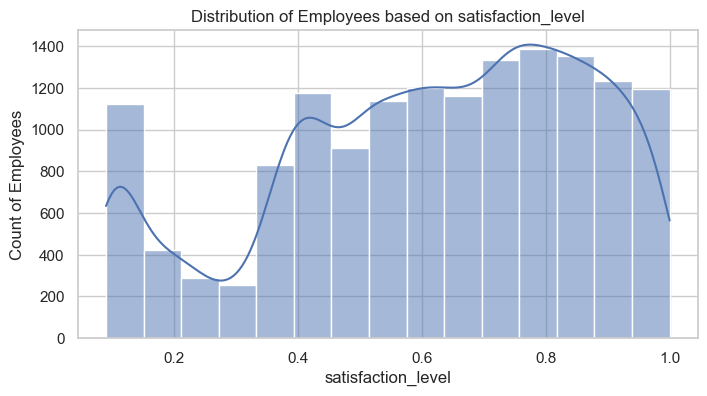

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


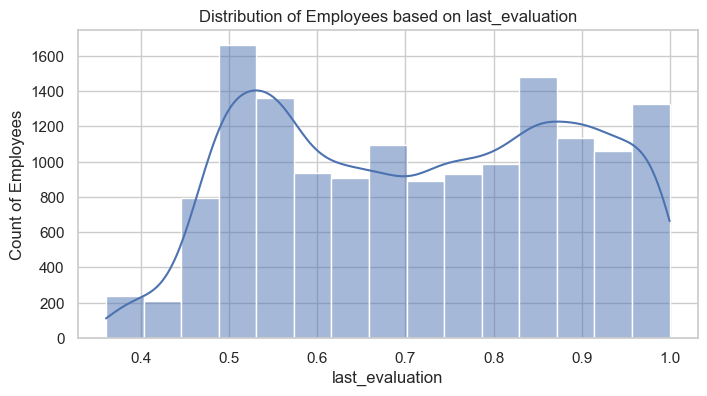

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


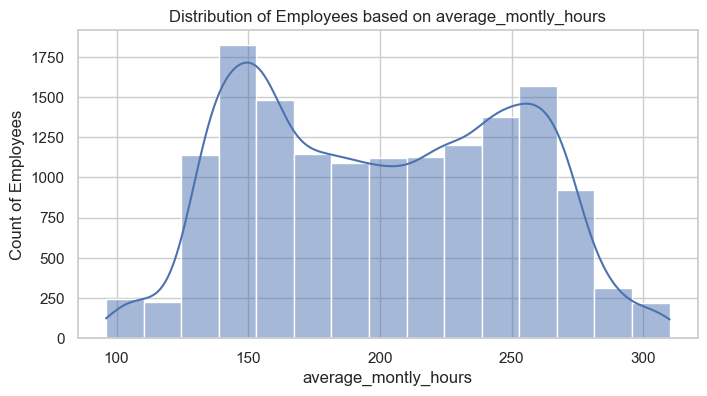

In [ ]:
show_turnover = False
for feature in numeric_vars_2:
    utils.histplot_employee_by(feature, df, show_turnover )


__Observations__

- Satisfaction of employees is high.  

- There is a significant number of employees with evaluations around 0.5 and another group with evaluations around 0.9. Evaluations tend to cluster around those two values. 

- The distribution of employees based on avg monthly hours,  shows a significant number of employees with an avg betweem 150 and 250 hours per month.


__Draw the bar plot of the Employee Project Count of both employees who left and stayed__


In [ ]:
df.left.value_counts()
df.groupby(['number_project', 'left']).left.count()

number_project  left
2               0        821
                1       1567
3               0       3983
                1         72
4               0       3956
                1        409
5               0       2149
                1        612
6               0        519
                1        655
7               1        256
Name: left, dtype: int64

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/sit

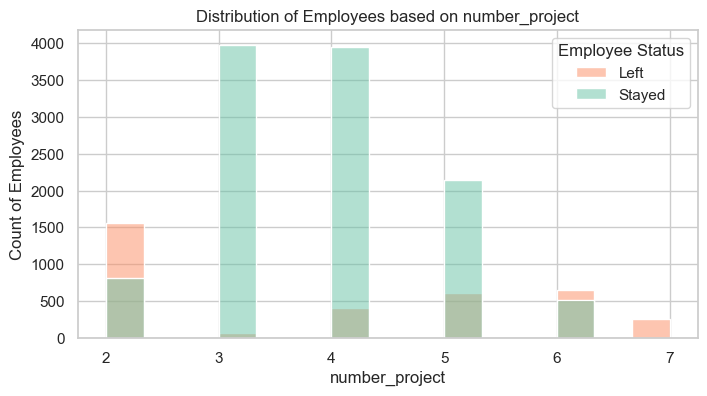

In [ ]:
# Create a bar plot for number of projects by employees' status (left or stayed)
show_turnover = True
show_kde = False
utils.histplot_employee_by('number_project', df, show_turnover, show_kde)

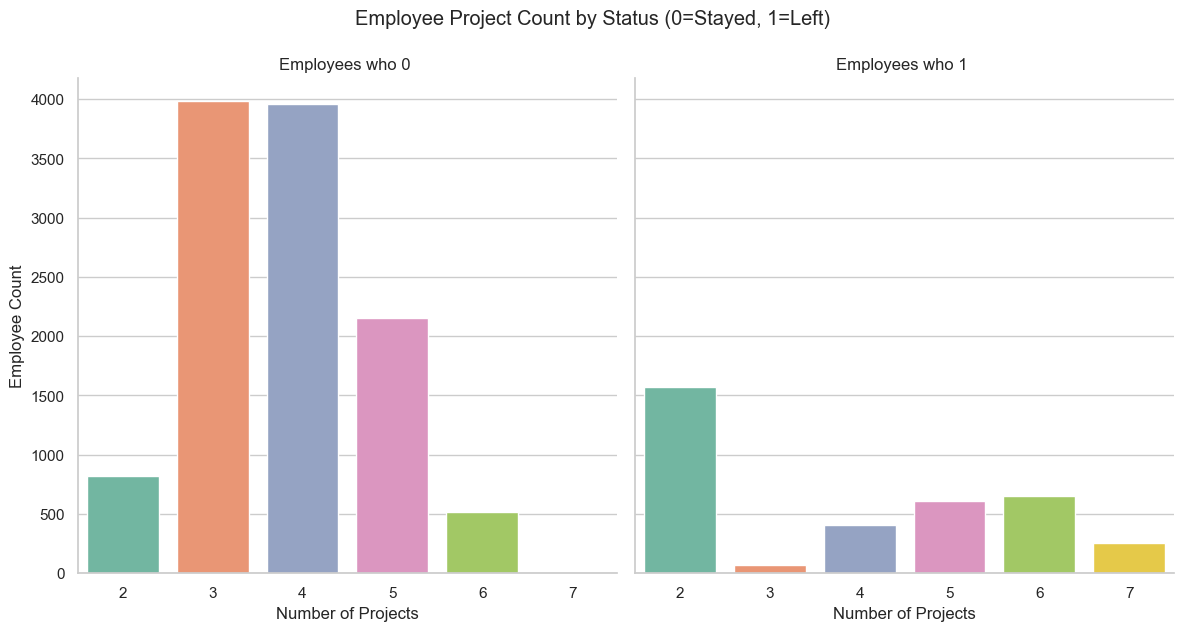

In [ ]:
# Create a categorical plot (catplot) as a bar plot
g = sns.catplot(x='number_project', col='left', kind='count', data=df, palette='Set2', height=6, aspect=1)
g.set_axis_labels('Number of Projects', 'Employee Count')
g.set_titles('Employees who {col_name} ')
g.figure.suptitle('Employee Project Count by Status (0=Stayed, 1=Left)', y=1.05)  # Adjust the main title and its position
plt.show()

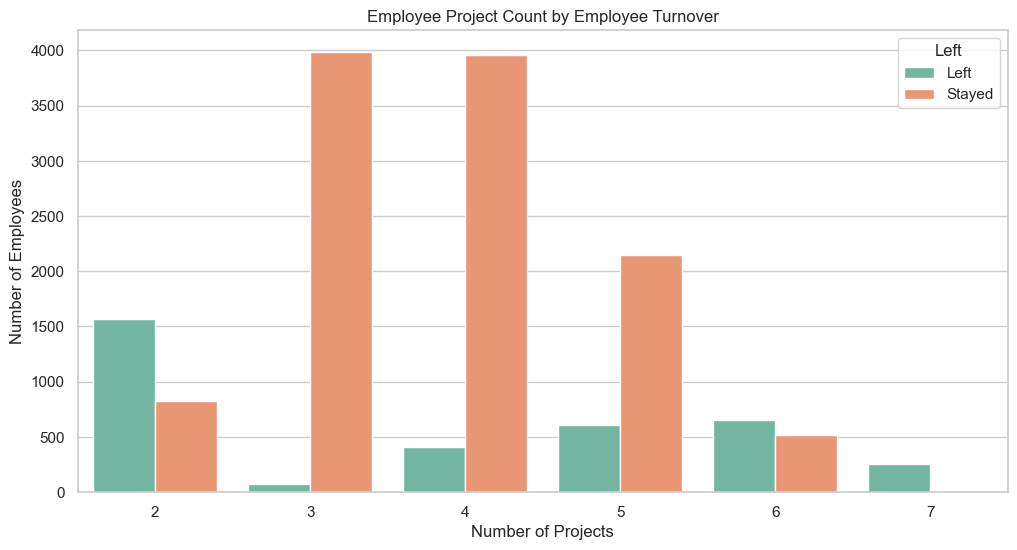

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'left' column is treated as a str variable
df1['left'] = df1['left'].astype('str')

# Plot the bar plot side to side of Employee Project Count with respect to employee turnover
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='number_project', hue='left', palette='Set2')
plt.title('Employee Project Count by Employee Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Left', 'Stayed'])
plt.show()



__Observations__

Inferences from the plots:


It allow us to observe how the distribution of projects is spread among those who left the organization compared to those who stayed.

Employees handling medium number of projects (between 3 and 5 projects) seem to have a lower turnover (stayed), indicating ideal workload for employees.

It seems that the extreme have higher turnover. Employees handling fewer projects (2), or handling too many projects (between 5 and 7) have higher turnover.

## 3. Perform clustering of employees who left based on their satisfaction and evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print('All packages for clustering imported successfully!')

All packages for clustering imported successfully!


/var/folders/lk/rsf38rvj3qj0tpdcgt79nwkm0000gn/T/ipykernel_81254/1626571617.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['cluster'] = kmeans.fit_predict(data_scaled)


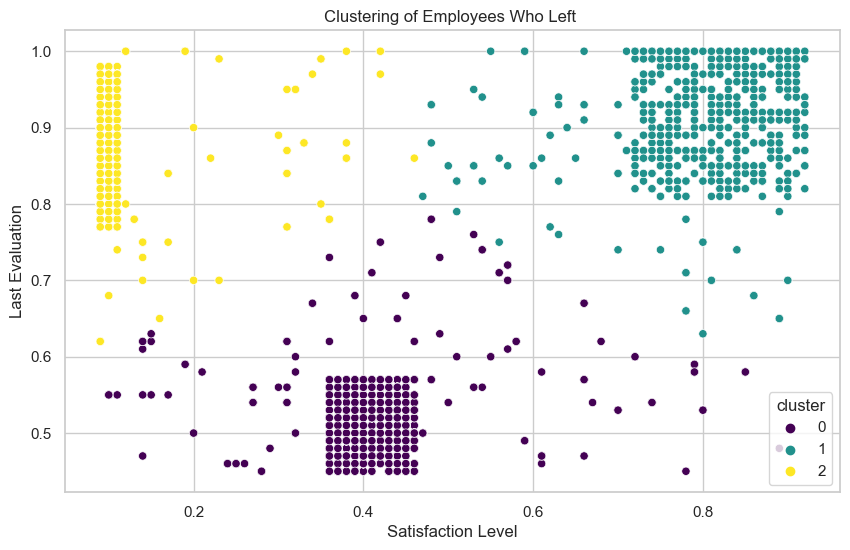

In [ ]:
# Filter the dataset for employees who left
left_df = df[df['left'] == 1]
# Select relevant columns
data = left_df.loc[:, ('satisfaction_level', 'last_evaluation')]
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_df['cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_df, palette='viridis')
plt.title('Clustering of Employees Who Left ')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()


__Observations__
- Cluster 0 (Purple):  Employees had low satisfaction and low evaluation score, which could mean that they problably left because they weren't happy with their work and felt undervalued.
- Cluster 1 (Green): Employees had high satisfaction and high evaluation scores but they probably chose to leave for reasons other than dissatisfaction or a lack of recognition (e.g. personal reasons)
- Cluster 2 (Yellow): Employees had high evaluation but lower satisfaction scores. It suggests that employees are high performers based on their evaluations but are very dissatisfied with their jobs. It could indicate that factors other than performance (work environment, work-life balance, or recognition, personal reasons )

## 4. Handle the left Class Imbalance using the SMOTE technique

<Axes: ylabel='sales'>

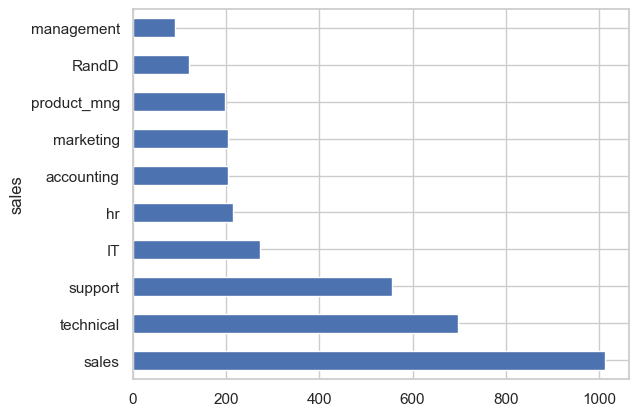

In [ ]:
# Check imbalance first
left_df.sales.value_counts().plot.barh()

<Axes: ylabel='salary'>

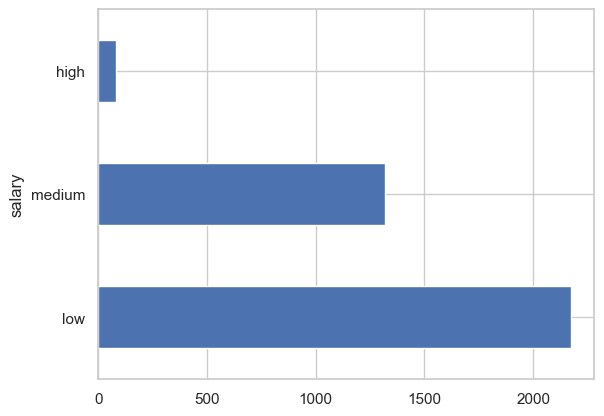

In [ ]:
# Check imbalance
left_df.salary.value_counts().plot.barh()

In [ ]:
sales_df = left_df[left_df.sales == "sales"]
technical_df = left_df[left_df.sales == "technical"]
support_df = left_df[left_df.sales == "support"]
IT_df = left_df[left_df.sales == "IT"]
hr_df = left_df[left_df.sales == "hr"]
accounting_df = left_df[left_df.sales == "accounting"]
marketing_df = left_df[left_df.sales == "marketing"]
product_mng_df = left_df[left_df.sales == "product_mng"]
RandD_mng_df = left_df[left_df.sales == "RandD"]
management_df = left_df[left_df.sales == "management"]

print(f'sales_df: {sales_df.shape}')
print(f'technical_df: {technical_df.shape}')
print(f'support_df: {support_df.shape}')
print(f'IT_df: {IT_df.shape}')
print(f'hr_df: {hr_df.shape}')
print(f'accounting_df: {accounting_df.shape}')
print(f'marketing_df: {marketing_df.shape}')
print(f'product_mng_df: {product_mng_df.shape}')
print(f'RandD_mng_df: {RandD_mng_df.shape}')
print(f'management_df: {management_df.shape}')

sales_df: (1014, 11)
technical_df: (697, 11)
support_df: (555, 11)
IT_df: (273, 11)
hr_df: (215, 11)
accounting_df: (204, 11)
marketing_df: (203, 11)
product_mng_df: (198, 11)
RandD_mng_df: (121, 11)
management_df: (91, 11)


### Pre-process the data by converting categorical columns to numerical columns

In [ ]:
# Separate features and target
X = df.drop('left', axis=1)
y = df['left']

# Separate categorical and numerical variables
cols = list(df.columns)
categorical_vars = cols[-2:] #['sales', 'salary']
numeric_vars = X.drop(columns=categorical_vars).columns

# Apply get_dummies to categorical variables
X_categorical = pd.get_dummies(X[categorical_vars], drop_first=True)
X_categorical.head()

# Combine categorical and numeric variables
X_combined = pd.concat([X[numeric_vars], X_categorical], axis=1)

### Stratified split of the dataset to train and test 


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler

print('All packages for handling Class Imbalance imported successfully!')

All packages for handling Class Imbalance imported successfully!


In [ ]:
# Stratified split of the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=123)

# Upsample the train dataset using SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after SMOTE
print("Distribution of target variable before SMOTE:")
print(y.value_counts())
print("\n")
print("Distribution of target variable after SMOTE:")
print(y_train_resampled.value_counts())
print("\n")
# Display the shape of the resampled training set and the distribution of the target variable
print("Resampled training set shape:", X_train_resampled.shape)
print("Resampled training target distribution:\n", y_train_resampled.value_counts(normalize=True))


Distribution of target variable before SMOTE:
left
0    11428
1     3571
Name: count, dtype: int64


Distribution of target variable after SMOTE:
left
0    9142
1    9142
Name: count, dtype: int64


Resampled training set shape: (18284, 18)
Resampled training target distribution:
 left
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Standardize the features
scaler = StandardScaler()

# Fit and transform the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Now you can use X_train_res_scaled and y_train_res for training machine learning models
print(f"Shape of training data after Scaler: {X_train_resampled_scaled.shape}")
print(f"Shape of testing data: {X_test_scaled.shape}")

Shape of training data after Scaler: (18284, 18)
Shape of testing data: (3000, 18)


## 5. Performing  5-fold cross-validation model training and evaluate performance


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import utils

print('All packages for  5-fold cross-validatione imported successfully!')

All packages for  5-fold cross-validatione imported successfully!


### Train a Logistic Regression model and apply 5-fold cross-validation

Logistic Regression AUC Scores: [0.80066022 0.79355371 0.79873345 0.79518199 0.78911379]
Logistic Regression Mean Cross-Validation Accuracy: 0.5240

Classification Report for Training Data with 5-Fold Cross-Validation:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



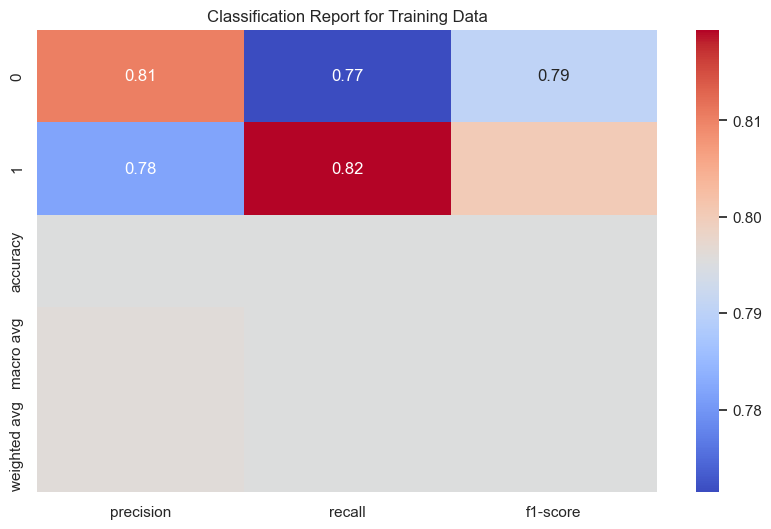

In [127]:
# Initialize a Logistic Regression model and apply 5-fold cross-validation
log_reg = LogisticRegression(max_iter=10000, random_state=123)

# Fit the model on the whole training data
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# # Define scoring metric
scoring = make_scorer(roc_auc_score)

# Perform 5-fold cross-validation for Logistic Regression
log_reg_scores = cross_val_score(log_reg, X_train_resampled_scaled, y_train_resampled, cv=cv, scoring=scoring)
print("Logistic Regression AUC Scores:", log_reg_scores)

y_train_predicted = cross_val_predict(log_reg, X_train_resampled_scaled, y_train_resampled, cv=cv)

print(f"Logistic Regression Mean Cross-Validation Accuracy: {y_train_predicted.mean():.4f}\n")

# Generate classification report based on y_train_predicted (cross_val_predict)
report = classification_report(y_train_resampled, y_train_predicted, output_dict=True)
print("Classification Report for Training Data with 5-Fold Cross-Validation:")
print(classification_report(y_train_resampled, y_train_predicted))
# Plot classification
utils.plot_classification_report(report, "Classification Report for Training Data")


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000

y_test: (3000,) y_test_pred: (3000,)


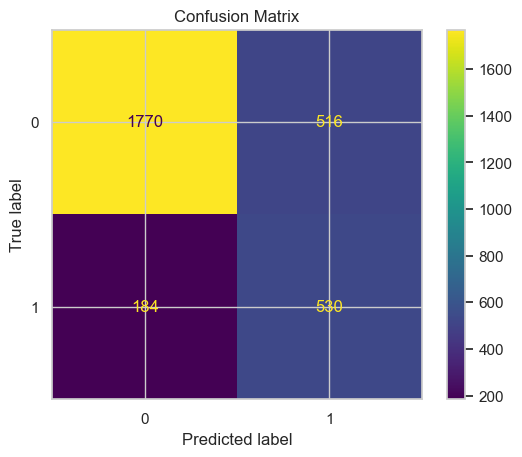

In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate on the test set
y_test_pred = log_reg.predict(X_test_scaled)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

print(f"y_test: {y_test.shape} y_test_pred: {y_test_pred.shape}")

## Building the matrix first by using y_test_pred 
# print("Confusion Matrix for Test Data:")
# cm = confusion_matrix(y_test, y_test_pred,  labels=log_reg.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=log_reg.classes_)
# disp.plot()
# plt.title('Confusion Matrix')
# plt.show()

## Using ConfusionMatrixDisplay.from_estimator which takes X_test_scaled
# Plot confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
cm_display.ax_.set_title('Confusion Matrix')
plt.show()

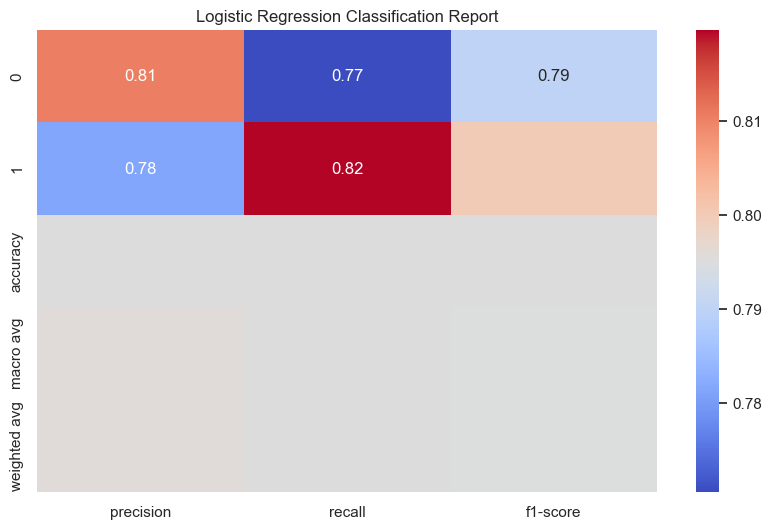

In [ ]:
## By fit & predict each fold based on cross-validation strategy (StratifiedKFold)  -- Same result
# # Initialize lists to store classification reports
log_reg_reports = []
# Perform 5-fold cross-validation for Logistic Regression
for train_index, test_index in cv.split(X_train_resampled_scaled, y_train_resampled):
    X_train, X_test = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]

    # had to rename y_test to y_test_local because it gets confused with the one used when stratified split
    # not having the same issue with X_train, y_train, X_test as it gets SMOTE and Scalar
    y_train, y_test_local = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]
    
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    report = classification_report(y_test_local, y_pred, output_dict=True)
    log_reg_reports.append(report)

# Aggregate reports
log_reg_aggregated_report = utils.aggregate_reports(log_reg_reports)

# Plot the classification reports
utils.plot_classification_report(log_reg_aggregated_report, 'Logistic Regression Classification Report') 

__Observation__

StratifiedKFold ensures that each fold maintains the same class distribution as the overall dataset, which is crucial for reliable cross-validation results, especially with imbalanced datasets.

 ### Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report

In [135]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Initialize the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=123)
random_forest.fit(X_train_resampled_scaled, y_train_resampled)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)
random_forest_scores = cross_val_score(random_forest, X_train_resampled_scaled, y_train_resampled, cv=kf)

# Print cross-validation results
print(f'Random Forest k-fold cross-validation scores: {random_forest_scores}')
print(f'Random Forest\'s mean accuracy: {random_forest_scores.mean():.4f}')

y_train_pred = cross_val_predict(random_forest, X_train_resampled_scaled, y_train_resampled, cv=kf)
print(f"Random Forest k-fold cross-validation predict mean: {y_train_pred.mean():.4f}\n")

# # Plot the classification report
report = classification_report(y_train_resampled, y_train_pred, output_dict=True)
print("Classification Report for Training Data with 5-Fold Cross-Validation:")
print(classification_report(y_train_resampled, y_train_pred))
# Plot classification
utils.plot_classification_report(report, "Classification Report for Training Data")

# # Fit the model on the whole training data
random_forest.fit(X_train_resampled_scaled, y_train_resampled)

# Evaluate on the test set
y_test_pred = random_forest.predict(X_test_scaled)

# # Print the classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))
print(f"y_test: {y_test.shape} y_test_pred: {y_test_pred.shape}")

cm = confusion_matrix(y_test, y_test_pred,  labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_forest.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Random Forest k-fold cross-validation scores: [0.98605414 0.98769483 0.98496035 0.98031173 0.98769147]
Random Forest's mean accuracy: 0.9853


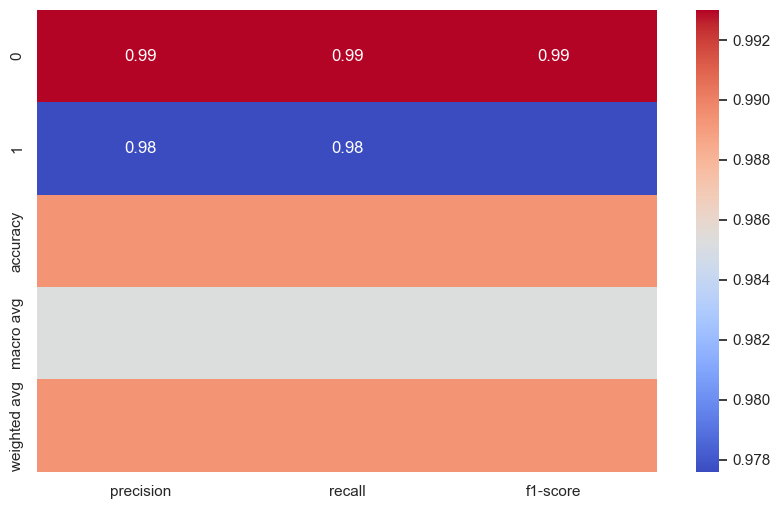

In [ ]:
report = classification_report(y_test, y_test_pred, output_dict=True)
utils.plot_classification_report(report, "")

### Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report


In [136]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(random_state=123)
gb_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)
gb_classifier_scores = cross_val_score(gb_classifier, X_train_resampled_scaled, y_train_resampled, cv=kf)

# Print cross-validation results
print(f'Gradient Boosting Classifier k-fold cross-validation scores: {gb_classifier_scores}')
print(f'Gradient Boosting Classifier\'s mean accuracy: {gb_classifier_scores.mean():.4f}')

# Apply 5-fold cross-validation
y_train_pred_cv = cross_val_predict(gb_classifier, X_train_resampled_scaled, y_train_resampled, cv=5)

# Generate classification report
report = classification_report(y_train_resampled, y_train_pred_cv, output_dict=True)
print(f"Gradient Boosting Classifier Cross-Validation Accuracy: {y_train_pred_cv.mean():.4f}\n")

print("Classification Report for Training Data with 5-Fold Cross-Validation:")
print(classification_report(y_train_resampled, y_train_pred))

Gradient Boosting Classifier Cross-Validation Accuracy: 0.4858

Classification Report for Training Data with 5-Fold Cross-Validation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9142
           1       1.00      0.98      0.99      9142

    accuracy                           0.99     18284
   macro avg       0.99      0.99      0.99     18284
weighted avg       0.99      0.99      0.99     18284



Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.93      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



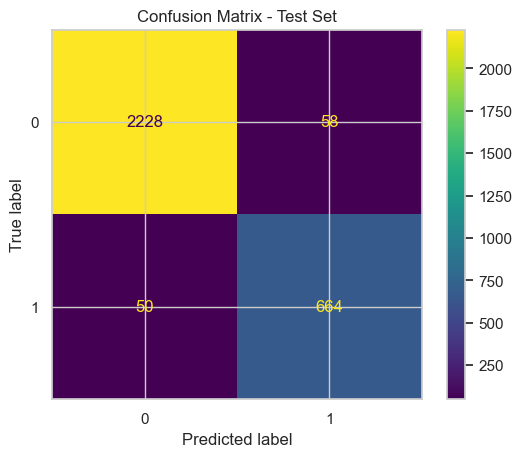

In [ ]:
# Evaluate on the test set
y_test_pred = gb_classifier.predict(X_test_scaled)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(gb_classifier, X_test_scaled, y_test)
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
report = classification_report(y_test, y_test_pred, output_dict=True)
plot_classification_report(report)